#### Import the essential libraries

In [ ]:
import pandas as pd
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

#### Read the parties and candidates list

In [101]:
data=pd.read_csv('2018.csv')
parties=pd.read_csv('parties.csv')

In [102]:
candidates_count=data.groupby('Constituency_title').count()

#### Number of candidates in a constituency on average

In [103]:
candidates_count.Party.mean()

12.668

#### Find out the constituencies with the maximum candidates

In [104]:
data.groupby(['Constituency_title'])['Seat'].count().nlargest(10)

Constituency_title
NA-45     39
NA-48     35
NA-53     33
NA-259    31
NA-50     28
NA-54     28
NA-44     26
NA-17     25
NA-207    25
NA-260    25
Name: Seat, dtype: int64

#### Find out the constituency with the lowest number of candidates

In [105]:
data.groupby(['Constituency_title'])['Seat'].count().nsmallest(10)

Constituency_title
NA-18     1
NA- 14    3
NA-14     4
NA? 14    4
NA-160    5
NA-186    5
NA-190    5
NA-20     5
NA-29     5
NA-119    6
Name: Seat, dtype: int64

In [98]:
def resolveParty(x):
    max=0
    match=''
    for i in parties['Name of Political Party']:
        r=fuzz.ratio(x,i)
        if r>max:
            max=r
            match=i
    return match

#### Find out the best match for a party name, resolving spelling mistakes

In [106]:
extracted_parties=data.Party.apply(lambda x: resolveParty(x))

In [107]:
data.Party=extracted_parties

#### Find number of candidates per party

In [108]:
seats=data.groupby(['Party'])['Seat'].count()

In [109]:
party_position=seats.nlargest(11)

In [110]:
party_position

Party
Independent                                1371
Pakistan Peoples Party Parliamentarians     219
Pakistan Tehreek-e-Insaf                    218
Pakistan Muslim League (N)                  186
Tehreek Labbaik Pakistan                    160
National Party                              152
Mutahida Majlis-e-Amal Pakistan             131
Allah-O-Akbar Tehreek                        62
Awami National Party                         62
Pak Sarzameen Party                          51
All Pakistan Muslim League                   42
Name: Seat, dtype: int64

#### Plot the parties with most number of candidates

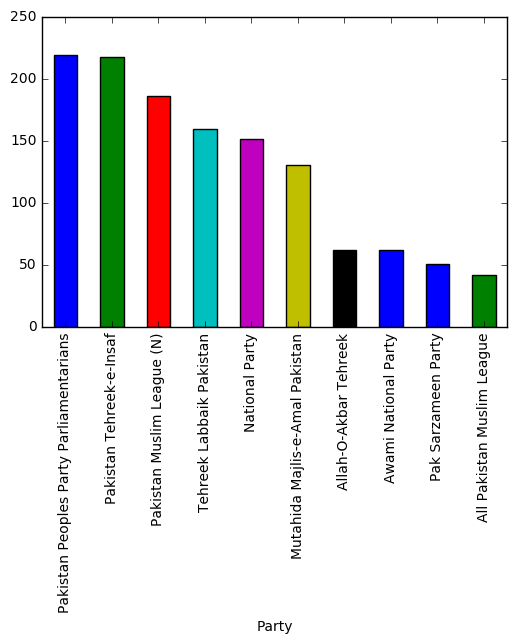

In [112]:
party_position.iloc[1:].plot(kind='bar')
plt.show()

#### Party with least number of seats

In [113]:
seats.nsmallest(10)

Party
Front National Pakistan                  1
Jamiat Ulma-e-Islam Nazryati Pakistan    1
National Peace Council Party             1
Pakistan Awami Inqelabi League           1
Pakistan Freedom Movement                1
Pakistan Human Rights Party              1
Pakistan Justice and Democratic Party    1
Pakistan Muslim League Organization      1
Pakistan Tehreek-e-Insaniat              1
Peoples Movement of Pakistan             1
Name: Seat, dtype: int64